<a href="https://colab.research.google.com/github/Huangjian2013/ai-demo/blob/main/feature/12-Supervision-003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision --quiet
!pip install opencv-python --quiet
!pip install ultralytics --quiet
!pip install matplotlib --quiet

import cv2
import supervision as sv
from ultralytics import YOLO
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 11.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 66.4MB/s]



0: 384x640 1 person, 1 chair, 1 potted plant, 1 laptop, 3 vases, 403.1ms
Speed: 4.1ms preprocess, 403.1ms inference, 31.4ms postprocess per image at shape (1, 3, 384, 640)


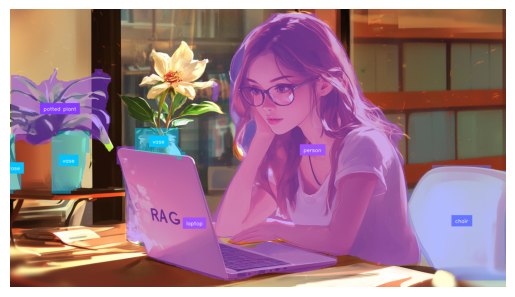

In [8]:
model = YOLO("yolo11n-seg.pt")
image = cv2.imread("sample_data/src002.png")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

mask_annotator = sv.MaskAnnotator()
label_annotator_v2 = sv.LabelAnnotator(text_position=sv.Position.CENTER_OF_MASS)

annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator_v2.annotate(
    scene=annotated_image, detections=detections)

# Convert BGR to RGB for displaying with matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image using matplotlib
plt.imshow(annotated_image_rgb)
plt.axis('off')  # Optional: turn off the axis
plt.show()
